In [14]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_and_clinical = pd.merge(clinical_data, mouse_data, how='left', on='Mouse ID')

# Display the data table for preview
mouse_and_clinical.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [15]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_grouped = mouse_and_clinical.groupby(['Drug', 'Timepoint']) 
average_tumor = drug_timepoint_grouped["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
mean_tumor_volume = pd.DataFrame(average_tumor)

# reset the index 
mean_tumor_volume = mean_tumor_volume.reset_index()

# Preview DataFrame
mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [16]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_volume = drug_timepoint_grouped["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
standard_error_volume = pd.DataFrame(sem_volume)

# reset the index 
standard_error_volume = standard_error_volume.reset_index()

# Preview DataFrame
standard_error_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [17]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_time = mean_tumor_volume.pivot(index ='Timepoint', columns ='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_response_time.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


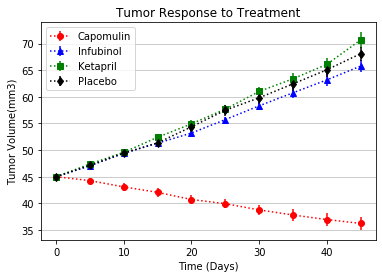

In [18]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 5)

capomulin_err = standard_error_volume.loc[standard_error_volume["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
infubinol_err = standard_error_volume.loc[standard_error_volume["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
ketapril_err = standard_error_volume.loc[standard_error_volume["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
placebo_err = standard_error_volume.loc[standard_error_volume["Drug"] == "Placebo", "Tumor Volume (mm3)"]

plt.errorbar(x_axis, tumor_response_time["Capomulin"], yerr= capomulin_err, marker= "o", color="red", label= "Capomulin", linestyle="dotted")
plt.errorbar(x_axis, tumor_response_time["Infubinol"], yerr= infubinol_err, marker= "^", color="blue", label= "Infubinol", linestyle="dotted")
plt.errorbar(x_axis, tumor_response_time["Ketapril"], yerr= ketapril_err, marker= "s", color="green", label= "Ketapril", linestyle="dotted")
plt.errorbar(x_axis, tumor_response_time["Placebo"], yerr= placebo_err, marker= "d", color="black", label= "Placebo", linestyle="dotted")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume(mm3)")

plt.legend(loc="best")
plt.grid(color='black', alpha=0.25, axis='y')

# Save the Figure
plt.savefig("Images/Tumor_Response.png")


In [19]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [20]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_timepoint_grouped = mouse_and_clinical.groupby(['Drug', 'Timepoint']) 
average_metastatic = drug_timepoint_grouped["Metastatic Sites"].mean()

# Convert to DataFrame
average_metastatic_df = pd.DataFrame(average_metastatic)

# reset the index 
average_metastatic_df = average_metastatic_df.reset_index()

# Preview DataFrame
average_metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [21]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastatic = drug_timepoint_grouped["Metastatic Sites"].sem()

# Convert to DataFrame
sem_metastatic_df = pd.DataFrame(sem_metastatic)

# reset the index 
sem_metastatic_df = sem_metastatic_df.reset_index()

# Preview DataFrame
sem_metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [22]:
# Minor Data Munging to Re-Format the Data Frames

metastatic_response = average_metastatic_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
metastatic_response.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


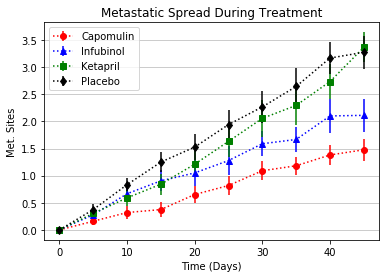

In [23]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 5)

capomulin_err = sem_metastatic_df.loc[standard_error_volume["Drug"] == "Capomulin", "Metastatic Sites"]
infubinol_err = sem_metastatic_df.loc[standard_error_volume["Drug"] == "Infubinol", "Metastatic Sites"]
ketapril_err = sem_metastatic_df.loc[standard_error_volume["Drug"] == "Ketapril", "Metastatic Sites"]
placebo_err = sem_metastatic_df.loc[standard_error_volume["Drug"] == "Placebo", "Metastatic Sites"]

plt.errorbar(x_axis, metastatic_response["Capomulin"], yerr= capomulin_err, marker= "o", color="red", label= "Capomulin", linestyle="dotted")
plt.errorbar(x_axis, metastatic_response["Infubinol"], yerr= infubinol_err, marker= "^", color="blue", label= "Infubinol", linestyle="dotted")
plt.errorbar(x_axis, metastatic_response["Ketapril"], yerr= ketapril_err, marker= "s", color="green", label= "Ketapril", linestyle="dotted")
plt.errorbar(x_axis, metastatic_response["Placebo"], yerr= placebo_err, marker= "d", color="black", label= "Placebo", linestyle="dotted")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")

plt.legend(loc="best")
plt.grid(color='black', alpha=0.25, axis='y')

# Save the Figure
plt.savefig("Images/Metastatic_Response.png")

# Show the Figure
plt.show()

## Survival Rates

In [24]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_timepoint_grouped = mouse_and_clinical.groupby(['Drug', 'Timepoint']) 
survival_count = drug_timepoint_grouped["Tumor Volume (mm3)"].count()

# Convert to DataFrame
survival_rate = pd.DataFrame({"Mouse Count": survival_count})

# reset the index 
survival_rate = survival_rate.reset_index()

# Preview DataFrame
survival_rate.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [25]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates = survival_rate.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame
survival_rates.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


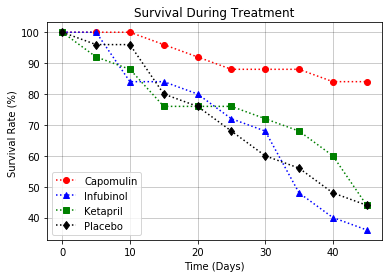

In [26]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0, 50, 5)
plt.plot(x_axis, (survival_rates["Capomulin"]/25)*100 , marker= "o", color="red", label= "Capomulin", linestyle='dotted')
plt.plot(x_axis, (survival_rates["Infubinol"]/25)*100 , marker= "^", color="blue", label= "Infubinol", linestyle='dotted')
plt.plot(x_axis, (survival_rates["Ketapril"]/25)*100 , marker= "s", color="green", label= "Ketapril", linestyle='dotted')
plt.plot(x_axis, (survival_rates["Placebo"]/25)*100 , marker= "d", color="black", label= "Placebo", linestyle='dotted')

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%) ")

plt.legend(loc="best")
plt.grid(color='black', alpha=0.25,)

# Save the Figure
plt.savefig("Images/Survival_Rates.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [27]:
# Calculate the percent changes for each drug
percent_changes = (tumor_response_time.loc[45, :] - tumor_response_time.loc[0, :])/tumor_response_time.loc[0, :] * 100

# Display the data to confirm
percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

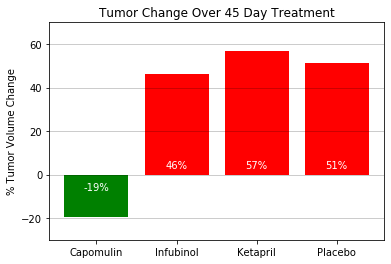

In [37]:
# Store all Relevant Percent Changes into a Tuple
#changes_tuple = (percent_changes["Capomulin"], percent_changes["Infubinol"], percent_changes["Ketapril"], percent_changes["Placebo"])

# Splice the data between passing and failing drugs
passing_drug = percent_changes < 0

# Orient widths. Add labels, tick marks, etc.
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
percent_changes_list = [(percent_changes[durg])for durg in drugs]
percent_changes_chart = plt.bar(drugs, percent_changes_list, color=passing_drug.map({True:'green',False:'red'}))

plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid(color='black', alpha=0.25, axis='y')

#ax.set_ylim([-30,70])
plt.ylim(-30,70)

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(percent_changes_chart)

# Save the Figure
plt.savefig("Images/SummaryBarGraph.png")

# Show the Figure


plt.show()

# Observations:

1. When looking at the Tumor Response to Treatment graph, tumor volume decreased in size in response to the drug Capomulin while tumors increased in size at about the same rate in response to the other three drugs.
2. The Metastatic Response to Treatment graph shows that there was a gradual metastatic spread with each drug tested. While the drug Capolumin had the least spread, placebo had the most.
3. When looking at the Summery Bar Graph, can conclude that the drug Capomulin had the most desirable response as it decreased tumor volume during treatment. 

